In [15]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
rider_data=pd.read_csv(ride_data_to_load)
rider_data.head()

# Combine the data into a single dataset
combined_data=pd.merge(rider_data,city_data,on="city")

# Display the data table for preview
combined_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [58]:
by_city=combined_data.groupby(["type","city"])
average_fare=by_city["fare"].mean()
average_fare.head()
total_ride=by_city["ride_id"].count()
total_ride
driver_count=by_city["driver_count"].mean()
driver_count
area_type=combined_data["type"].unique()
area_type

array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Bubble Plot of Ride Sharing Data

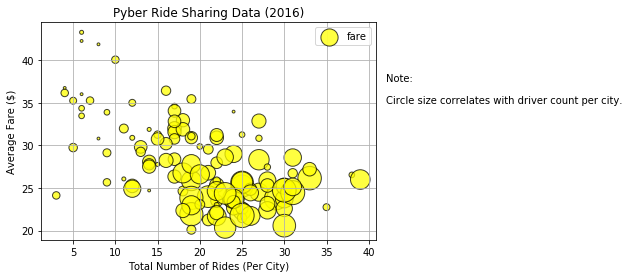

In [76]:
# Obtain the x and y coordinates for each of the three city types

plt.scatter(total_ride,average_fare,marker="o",facecolors="yellow",alpha=0.75,edgecolors="black",s=8*driver_count)

# Build the scatter plots for each city types

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
# Create a legend
plt.legend(loc="upper right")
# Incorporate a text label regarding circle size
note="Note:"
plt.text(42,37.5,note)
content="Circle size correlates with driver count per city."
plt.text(42,35,content)
# Save Figure
# I do not know how to make facecolors change to type, or to include type as a 3rd variable
plt.savefig("../pyber.png")


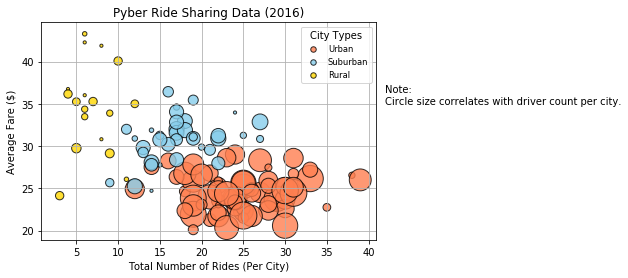

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

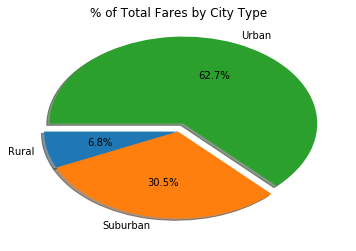

In [110]:
# Calculate Type Percents
by_type=combined_data.groupby(["type"])
total_fare=by_type["fare"].sum()
total_fare


# Build Pie Chart
plt.pie(total_fare,autopct="%1.1f%%", explode=(0,0,0.1),labels=["Rural","Suburban","Urban"],shadow=True,startangle=180)
plt.title("% of Total Fares by City Type")
total_fare
# Save Figure
plt.savefig("../Fare_by_type.png")


## Total Rides by City Type

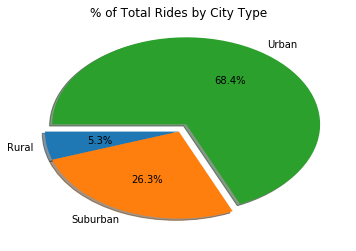

In [116]:
# Calculate Ride Percents
total_rides=by_type["ride_id"].count()
total_rides

# Build Pie Chart
plt.pie(total_rides,autopct="%1.1f%%", explode=(0,0,0.1),labels=["Rural","Suburban","Urban"],shadow=True,startangle=180)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Rides_by_type.png")

## Total Drivers by City Type

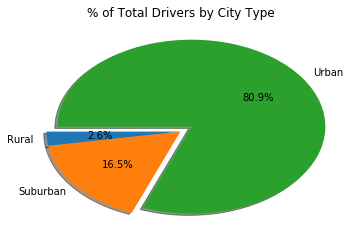

In [123]:
# Calculate Driver Percents
city_grouped=city_data.groupby(["type"])
driver_by_type=city_grouped["driver_count"].sum()
driver_by_type

# Build Pie Charts
plt.pie(driver_by_type,autopct="%1.1f%%", explode=(0,0,0.1),labels=["Rural","Suburban","Urban"],shadow=True,startangle=180)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Drivers_by_type.png")